# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

As a football fan i selected the soccer database from Kaggle. It contains data for football matches, players and teams from several European countries from 2008-2016. I decided to take a closer look at the team and player databases. Therefor i asked myself the following questions:


> Questions: 
1. Who are the players with an overall rating above 90? 
2. Who is the fastest player?
3. Do right or left feet players have the higher overall rating in the last existing data record?
4. Who is the highest and smallest player?
5. Who is the heaviest and lightest player?
6. Who is the player with the longest name?
7. Which team has the best increase in speed overall?

### SQL Preperation

The European football database was stored in a SQLite database.<br>
I used the software 'DB Browser for SQLite' and the following SQL statements to extract the datasets I needed:<p>

<b>Players</b><p>
The player database has been joined with the player attributes database<p>


    SELECT *
    FROM Player_Attributes pa
    JOIN Player p
    ON p.player_api_id = pa.player_api_id;
    
<b>Teams</b><p>
The team database has been joined with the team attributes database<p>

    SELECT *
    FROM Team t
    JOIN Team_Attributes ta
    ON ta.team_api_id = t.team_api_id;

In [94]:
# Import statement for packages needed in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import calendar
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [95]:
# Import datasets and use ';' as seperator, as there are some rows with ',' in it

df_p = pd.read_csv('football_player_attributes.csv',index_col='id', sep=';')
df_t = pd.read_csv('football_team_attributes.csv', index_col='id', sep=';')

In [96]:
# view first lines of players 
df_p.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,gk_kicking,gk_positioning,gk_reflexes,id.1,player_api_id.1,player_name,player_fifa_api_id.1,birthday,height,weight
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,9.0,7.0,7.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,9.0,7.0,7.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [97]:
# view first lines of teams
df_t.head()

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id.1,team_fifa_api_id.1,team_api_id.1,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
id,,,,,,,,,,,,,,,,,,,,,
49119,9930,434,FC Aarau,AAR,1,434,9930,2010-02-22 00:00:00,60,Balanced,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
49119,9930,434,FC Aarau,AAR,2,434,9930,2014-09-19 00:00:00,52,Balanced,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
49119,9930,434,FC Aarau,AAR,3,434,9930,2015-09-10 00:00:00,47,Balanced,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
39393,8485,77,Aberdeen,ABE,4,77,8485,2010-02-22 00:00:00,70,Fast,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
39393,8485,77,Aberdeen,ABE,5,77,8485,2011-02-22 00:00:00,47,Balanced,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [98]:
# show the shape of each dataset
df_p.shape, df_t.shape

((183978, 48), (1458, 29))

The player dataset has 183978 rows and 48 columns.<br>
The team dataset has 1458 rows and 29 columns.

In [99]:
# number of samples and data types in the player dataset
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 48 columns):
player_fifa_api_id      183978 non-null int64
player_api_id           183978 non-null int64
date                    183978 non-null object
overall_rating          183142 non-null float64
potential               183142 non-null float64
preferred_foot          183142 non-null object
attacking_work_rate     180748 non-null object
defensive_work_rate     183142 non-null object
crossing                183142 non-null float64
finishing               183142 non-null float64
heading_accuracy        183142 non-null float64
short_passing           183142 non-null float64
volleys                 181265 non-null float64
dribbling               183142 non-null float64
curve                   181265 non-null float64
free_kick_accuracy      183142 non-null float64
long_passing            183142 non-null float64
ball_control            183142 non-null float64
acceleration            183142 no

You can see that there are a lot of rows without values. The empty rows will be removed later.

In [100]:
# number of samples and data types in the team dataset
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 49119 to 3
Data columns (total 29 columns):
team_api_id                       1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_long_name                    1458 non-null object
team_short_name                   1458 non-null object
id.1                              1458 non-null int64
team_fifa_api_id.1                1458 non-null int64
team_api_id.1                     1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassin

There is only one row with missing values.<br> 
The row is buildUpPlayPassing. This empty rows will be removed later.

In [101]:
# sum of duplicates in the player dataset
sum(df_p.duplicated())

1

There is only 1 duplicated row in the player dataset. This duplicate will be removed later.

In [102]:
# sum of duplicates in the team dataset
sum(df_t.duplicated())

0

There are 0 duplicares in the player dataset.

In [103]:
# show columns with null values in player dataset
df_p.columns[df_p.isnull().any()]

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

Showing the columns with missing data.

In [104]:
# show columns with null values in team dataset
df_t.columns[df_t.isnull().any()]

Index(['buildUpPlayDribbling'], dtype='object')

There is only 1 column with missing values.

In [105]:
#count of unique players
df_p['player_api_id'].nunique()

11060

There are 11060 unique players in the player dataset

In [106]:
#count of unique teams
df_t['team_api_id'].nunique()

288

There are 288 unique teams in the team dataset

### Data Cleaning

In [107]:
# drop insignificant columns that are not relevant to the questions asked

#Columns to drop in df_p (football_player_attributes.csv): 'player_fifa_api_id', 'potential', 'crossing', 'finishing', 'heading_accuracy', 
#'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy','long_passing', 'ball_control', 'acceleration', 'agility', 'reactions', 
#'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 
#'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 
#'attacking_work_rate', 'defensive_work_rate', 'id.1', 'player_api_id.1', 'player_fifa_api_id.1'

#new dataframe name df_p_v1 has been assigned to make it easier to create and answer new questions after the project has finished
df_p_v1 = df_p.drop(['player_fifa_api_id', 'potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
'free_kick_accuracy','long_passing', 'ball_control', 'acceleration', 'agility', 'reactions', 'balance', 'shot_power', 
'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 
'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 
'attacking_work_rate', 'defensive_work_rate', 'id.1', 'player_api_id.1', 'player_fifa_api_id.1'], axis=1)

# show first line of new created player dataset
df_p_v1.head(1)

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight
id,,,,,,,,,
1,505942,2016-02-18 00:00:00,67.0,right,64.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


Dropped columns in the player dataset which are not needed for further analysis.

In [108]:
# drop insignificant columns that are not relevant to the questions asked

# Columns to drop in dp_t (football_team_attributes.csv): 'team_fifa_api_id', 'id.1', 'team_fifa_api_id.1', 'team_api_id.1', 'buildUpPlaySpeedClass', 'buildUpPlayDribbling', 'buildUpPlayDribblingClass',
#'buildUpPlayPassing', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 'chanceCreationPassing', 'chanceCreationPassingClass',
#'chanceCreationCrossing', 'chanceCreationCrossingClass', 'chanceCreationShooting', 'chanceCreationShootingClass', 'chanceCreationPositioningClass',
#'defencePressure', 'defencePressureClass', 'defenceAggression', 'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass'

#new dataframe name df_t_v1 has been assigned to make it easier to create and answer new questions after the project has finished
df_t_v1 = df_t.drop(['team_fifa_api_id', 'id.1', 'team_fifa_api_id.1', 'team_api_id.1', 'buildUpPlaySpeedClass', 'buildUpPlayDribbling', 'buildUpPlayDribblingClass',
'buildUpPlayPassing', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 'chanceCreationPassing', 'chanceCreationPassingClass',
'chanceCreationCrossing', 'chanceCreationCrossingClass', 'chanceCreationShooting', 'chanceCreationShootingClass', 'chanceCreationPositioningClass',
'defencePressure', 'defencePressureClass', 'defenceAggression', 'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass'], axis=1)

# show first line of new created team dataset
df_t_v1.head(1)

,team_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed
id,,,,,
49119,9930,FC Aarau,AAR,2010-02-22 00:00:00,60


Dropped columns in the team dataset which are not needed for further analysis.

In [109]:
# rename column buildUpPlaySpeed in df_t_v1
df_t_v1 = df_t_v1.rename(columns={'buildUpPlaySpeed': 'speed'})

# show first line of team dataset to check whether the column change worked
df_t_v1.head(1)

,team_api_id,team_long_name,team_short_name,date,speed
id,,,,,
49119,9930,FC Aarau,AAR,2010-02-22 00:00:00,60


In [110]:
# save new datasets 
df_p_v1.to_csv('football_player_attributes_v2.csv', index=False)
df_t_v1.to_csv('football_team_attributes_v2.csv', index=False)

In [111]:
# load new datasets
df_p = pd.read_csv('football_player_attributes_v2.csv')
df_t = pd.read_csv('football_team_attributes_v2.csv')

In [112]:
# print first line of player dataset
df_p.head(1)

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight
0,505942,2016-02-18 00:00:00,67.0,right,64.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


In [113]:
# print first line of team dataset
df_t.head(1)

,team_api_id,team_long_name,team_short_name,date,speed
0,9930,FC Aarau,AAR,2010-02-22 00:00:00,60


In [114]:
# shape player dataset
df_p.shape

(183978, 9)

The new shape of the player dataset after deletion of unecessary columns are:<br>
183978 rows<br>
9 columns

In [115]:
# shape team dataset
df_t.shape

(1458, 5)

The new shape of the team dataset after deletion of unecessary columns are:<br>
1458 rows<br>
5 columns

In [116]:
# info player dataset
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 9 columns):
player_api_id     183978 non-null int64
date              183978 non-null object
overall_rating    183142 non-null float64
preferred_foot    183142 non-null object
sprint_speed      183142 non-null float64
player_name       183978 non-null object
birthday          183978 non-null object
height            183978 non-null float64
weight            183978 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 12.6+ MB


In [117]:
# info team dataset
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 5 columns):
team_api_id        1458 non-null int64
team_long_name     1458 non-null object
team_short_name    1458 non-null object
date               1458 non-null object
speed              1458 non-null int64
dtypes: int64(2), object(3)
memory usage: 57.0+ KB


The date column is stored as string. Changing the datatype to datetime.

In [118]:
# column 'date' is a string, convert to datetime format
df_p['date'] = pd.to_datetime(df_p['date'])
df_t['date'] = pd.to_datetime(df_t['date'])

In [119]:
# column 'weight' is actual stored in pounds, I want this values in kilograms
# create new column 'weight_kg' that contains the players weight in kilograms
weight_kg = df_p['weight'] * 0.45359237
df_p['weight_kg'] = weight_kg
df_p.iloc[0:3, 8:].head()

,weight,weight_kg
0,187,84.821773
1,187,84.821773
2,187,84.821773


In [120]:
# check new datatype for date
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 10 columns):
player_api_id     183978 non-null int64
date              183978 non-null datetime64[ns]
overall_rating    183142 non-null float64
preferred_foot    183142 non-null object
sprint_speed      183142 non-null float64
player_name       183978 non-null object
birthday          183978 non-null object
height            183978 non-null float64
weight            183978 non-null int64
weight_kg         183978 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 14.0+ MB


In [121]:
# check new datatype for date
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 5 columns):
team_api_id        1458 non-null int64
team_long_name     1458 non-null object
team_short_name    1458 non-null object
date               1458 non-null datetime64[ns]
speed              1458 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 57.0+ KB


In [122]:
# check null values in player dataset
df_p.isnull().sum()

player_api_id       0
date                0
overall_rating    836
preferred_foot    836
sprint_speed      836
player_name         0
birthday            0
height              0
weight              0
weight_kg           0
dtype: int64

There are 4 rows with null values in the player dataset. We will drop this values.

In [123]:
# check null values in team dataset
df_t.isnull().any().sum()

0

There are no null values in the team dataset.

In [124]:
# drop null values in team dataset
df_t.dropna(axis=0, how='any', inplace=True)

In [125]:
# check if any null values are left in team dataset
df_t.isnull().sum().any() # should be False

False

In [126]:
# drop rows with null values for player dataset
df_p.dropna(axis=0, how='any', inplace=True)

In [127]:
# check if any null values are left in player datase
df_p.isnull().sum().any() # should be False

False

In [128]:
# count number of duplicate rows for player dataset
sum(df_p.duplicated())

0

In [129]:
# count number of duplicate rows for team dataset
sum(df_t.duplicated())

1

In [130]:
df_t.drop_duplicates(inplace=True)
sum(df_t.duplicated())

0

There are players in the dataset, where the player_name also includes their field number. We drop the field number, as we don't need it.

In [131]:
# find player names which are seperated by "," with the their field number
player_names = df_p[df_p['player_name'].str.contains(',')]
# show examples with player names and field numbers
player_names.head()

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight,weight_kg
675,194479,2016-03-24,73.0,right,76.0,"Abdoulaye Diallo Sadio,22",1990-12-28 00:00:00,182.88,168,76.203518
676,194479,2016-02-25,72.0,right,76.0,"Abdoulaye Diallo Sadio,22",1990-12-28 00:00:00,182.88,168,76.203518
677,194479,2016-01-07,72.0,right,76.0,"Abdoulaye Diallo Sadio,22",1990-12-28 00:00:00,182.88,168,76.203518
678,194479,2015-09-21,72.0,right,76.0,"Abdoulaye Diallo Sadio,22",1990-12-28 00:00:00,182.88,168,76.203518
679,194479,2015-07-03,71.0,right,78.0,"Abdoulaye Diallo Sadio,22",1990-12-28 00:00:00,182.88,168,76.203518


We´re going to take each player_name row and split them into two new rows - one with values for the player name (values before the ","), and the other with values for the second fuel type (values after the ","). At first let's seperate them into two dataframes.

In [132]:
# create one copy of the player dataset
# we only need one copy, as we don't need the player number and will drop the values behind the comma
df1 = player_names.copy() # data on the player name

# show copy head
df1.head(1)

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight,weight_kg
675,194479,2016-03-24,73.0,right,76.0,"Abdoulaye Diallo Sadio,22",1990-12-28 00:00:00,182.88,168,76.203518


In [133]:
# using Pandas apply function
# columns to split by ","
split_column = ['player_name']

# apply split function to each column of each dataframe copy
for c in split_column:
    df1[c] = df1[c].apply(lambda x: x.split(",")[0])

In [134]:
# this dataframe holds info for the player name
# aka values before the ","
df1.head()

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight,weight_kg
675,194479,2016-03-24,73.0,right,76.0,Abdoulaye Diallo Sadio,1990-12-28 00:00:00,182.88,168,76.203518
676,194479,2016-02-25,72.0,right,76.0,Abdoulaye Diallo Sadio,1990-12-28 00:00:00,182.88,168,76.203518
677,194479,2016-01-07,72.0,right,76.0,Abdoulaye Diallo Sadio,1990-12-28 00:00:00,182.88,168,76.203518
678,194479,2015-09-21,72.0,right,76.0,Abdoulaye Diallo Sadio,1990-12-28 00:00:00,182.88,168,76.203518
679,194479,2015-07-03,71.0,right,78.0,Abdoulaye Diallo Sadio,1990-12-28 00:00:00,182.88,168,76.203518


In [135]:
# add new dataframe to the original dataframe
new_rows = df1
# now we have seperated the player name from the field number, we won't use the field number
new_rows.head()

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight,weight_kg
675,194479,2016-03-24,73.0,right,76.0,Abdoulaye Diallo Sadio,1990-12-28 00:00:00,182.88,168,76.203518
676,194479,2016-02-25,72.0,right,76.0,Abdoulaye Diallo Sadio,1990-12-28 00:00:00,182.88,168,76.203518
677,194479,2016-01-07,72.0,right,76.0,Abdoulaye Diallo Sadio,1990-12-28 00:00:00,182.88,168,76.203518
678,194479,2015-09-21,72.0,right,76.0,Abdoulaye Diallo Sadio,1990-12-28 00:00:00,182.88,168,76.203518
679,194479,2015-07-03,71.0,right,78.0,Abdoulaye Diallo Sadio,1990-12-28 00:00:00,182.88,168,76.203518


In [136]:
# drop the original player_name rows
df_p.drop(player_names.index, inplace=True)

# add the newly seperated rows
df_p = df_p.append(new_rows, ignore_index=True)

In [137]:
# check that all the original player_name rows with "," are dropped
df_p[df_p['player_name'].str.contains(",")].sum().any() # should display False

False

There are no more values left in the player_name column with ",".

In [138]:
# save new dataset
df_p.to_csv('football_player_attributes_v3.csv', index=False)
df_t.to_csv('football_team_attributes_v3.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Who are the players with an overall rating above 90? 

In [139]:
# load new datasets
df_p = pd.read_csv('football_player_attributes_v3.csv')
df_t = pd.read_csv('football_team_attributes_v3.csv')

In [140]:
# find players with an overall_rating above 90 during their carrer
top_player = df_p.query('overall_rating > 90')

# show players
top_player

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight,weight_kg
6452,30723,2007-08-30,91.0,right,78.0,Alessandro Nesta,1976-03-19 00:00:00,187.96,174,78.925072
6453,30723,2007-02-22,91.0,right,88.0,Alessandro Nesta,1976-03-19 00:00:00,187.96,174,78.925072
12667,30955,2012-02-22,91.0,right,74.0,Andres Iniesta,1984-05-11 00:00:00,170.18,150,68.038856
12668,30955,2011-08-30,91.0,right,75.0,Andres Iniesta,1984-05-11 00:00:00,170.18,150,68.038856
33047,30893,2015-10-16,93.0,right,93.0,Cristiano Ronaldo,1985-02-05 00:00:00,185.42,176,79.832257
33048,30893,2015-09-25,93.0,right,93.0,Cristiano Ronaldo,1985-02-05 00:00:00,185.42,176,79.832257
33049,30893,2015-09-21,93.0,right,93.0,Cristiano Ronaldo,1985-02-05 00:00:00,185.42,176,79.832257
33050,30893,2015-05-15,92.0,right,94.0,Cristiano Ronaldo,1985-02-05 00:00:00,185.42,176,79.832257
33051,30893,2015-04-17,92.0,right,94.0,Cristiano Ronaldo,1985-02-05 00:00:00,185.42,176,79.832257
33052,30893,2014-10-31,92.0,right,94.0,Cristiano Ronaldo,1985-02-05 00:00:00,185.42,176,79.832257


Text(0,0.5,'Overall Rating')

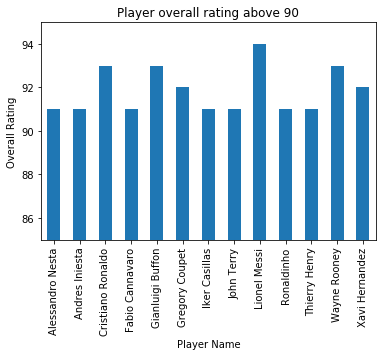

In [141]:
# create bar plot grouped by the player_name considering the best overall_rating achieved in their carrer
df_t_p = top_player.groupby('player_name')['overall_rating'].max().plot(kind='bar')
df_t_p.set_ylim(85,95) # set the y axis to 85-95 for better difference overview
plt.title('Player overall rating above 90')
plt.xlabel('Player Name')
plt.ylabel('Overall Rating')

There are a few players with an overall rating above 90 during their carrer.

The players are:

    1. Lionel Messi:       94
    2. Christiano Ronaldo: 93
    2. Gianluigi Buffon:   93
    2. Ronaldinho:         93
    3. Gregory Coupet:     92
    3. Xavi Hernandez:     92
    4. Allesandro Nesta:   91
    4. Andres Iniesta:     91
    4. Fabio Cannavaro:    91
    4. Iker Casillas:      91
    4. John Terry:         91
    4. Ronaldinho:         91
    4. Thierry Henry:      91

Lionel Messi is the player with the highest overall rating during his carrer.

### Research Question 2:  Who is the fastest player?

In [142]:
# get max speed value
df_p.sprint_speed.max()

97.0

The highest speed from a player is 97

In [143]:
# search all players with speed 97
fastest_player = df_p.query('sprint_speed == 97')
fastest_player

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight,weight_kg
39841,38243,2008-08-30,70.0,right,97.0,David Odonkor,1984-02-21 00:00:00,172.72,163,73.935556
117390,120428,2015-01-09,64.0,right,97.0,Mathis Bolly,1990-11-14 00:00:00,185.42,170,77.110703
117391,120428,2014-11-21,64.0,right,97.0,Mathis Bolly,1990-11-14 00:00:00,185.42,170,77.110703
117392,120428,2014-09-18,64.0,right,97.0,Mathis Bolly,1990-11-14 00:00:00,185.42,170,77.110703
117393,120428,2014-05-16,64.0,right,97.0,Mathis Bolly,1990-11-14 00:00:00,185.42,170,77.110703
117394,120428,2014-05-09,64.0,right,97.0,Mathis Bolly,1990-11-14 00:00:00,185.42,170,77.110703
117395,120428,2014-03-07,65.0,right,97.0,Mathis Bolly,1990-11-14 00:00:00,185.42,170,77.110703
117396,120428,2014-02-28,65.0,right,97.0,Mathis Bolly,1990-11-14 00:00:00,185.42,170,77.110703
117397,120428,2014-02-07,65.0,right,97.0,Mathis Bolly,1990-11-14 00:00:00,185.42,170,77.110703
117398,120428,2014-01-31,65.0,right,97.0,Mathis Bolly,1990-11-14 00:00:00,185.42,170,77.110703


Text(0,0.5,'Sprint Speed')

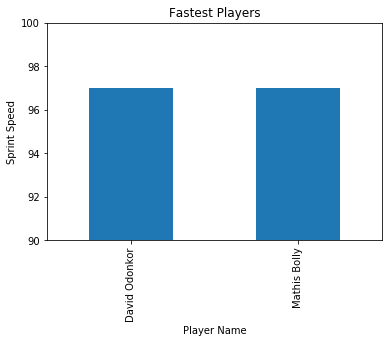

In [144]:
# create bar plot grouped by the player_name considering the max speed achieved in their carrer
df_f_p = fastest_player.groupby('player_name')['sprint_speed'].max().plot(kind='bar')
df_f_p.set_ylim(90,100) # set the y axis to 90-100 for better difference overview
plt.title('Fastest Players')
plt.xlabel('Player Name')
plt.ylabel('Sprint Speed')

There are 2 players with a speed of 97.<p>

The players are:<p>

David Odonkor<br>
Mathis Bolly

### Research Question 3: Do right or left feet players have the higher overall rating in the last existing data record?

In [145]:
# For further investigation of the dataset only keep the last rating date for the players
# sort the values for the player_api_id and date
df_p = df_p.sort_values(by=['player_api_id', 'date'])
# drop the unecessary values and only keep the last rating date
df_p.drop_duplicates(subset=['player_api_id'], keep='last', inplace=True)

In [146]:
# get the median amount of overall_rating
df_p['overall_rating'].median()

68.0

In [147]:
# select players with overall_rating less than the median
low_rating = df_p.query('overall_rating < 68')

# select players with overall_rating greater than or equal to the median
high_rating = df_p.query('overall_rating >= 68')

# ensure these queries included each sample exactly once
nump_samples = df_p.shape[0]
nump_samples == low_rating['overall_rating'].count() + high_rating['overall_rating'].count() # should be True

True

In [148]:
low_rating.shape, high_rating.shape

((5414, 10), (5646, 10))

Text(0,0.5,'Number of players')

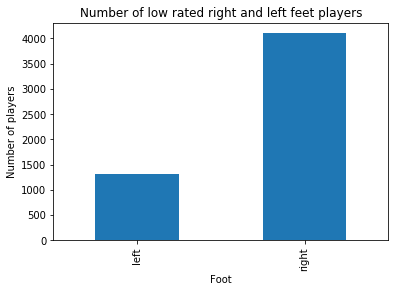

In [149]:
# for lower rating group using groupy and count the players prefer right or left foot
df_foot = low_rating.groupby('preferred_foot')['player_name'].count().plot(kind='bar')
plt.title('Number of low rated right and left feet players')
plt.xlabel('Foot')
plt.ylabel('Number of players')

The bar chart shows that there are a lot more low rated players prefer their right foot.

Text(0,0.5,'Numbers of players')

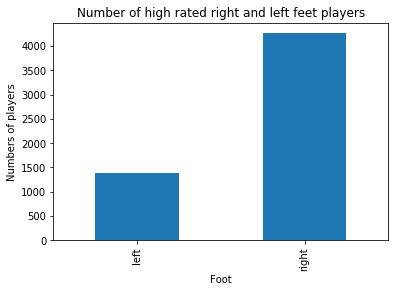

In [150]:
# for higher rating group using groupy and count the players prefer right or left foot
df_foot = high_rating.groupby('preferred_foot')['player_name'].count().plot(kind='bar')
plt.title('Number of high rated right and left feet players')
plt.xlabel('Foot')
plt.ylabel('Numbers of players')

The bar chart shows that there are a lot more high rated players prefer their right foot.

In [151]:
# count all players who prefer right or left foot
count_left_feet = df_p.query('preferred_foot == "left"')
count_right_feet = df_p.query('preferred_foot == "right"')

In [152]:
# count the low rating players who prefer their right foot
right_feet_low = low_rating.query('preferred_foot == "right"')
# number of players in low rating prefer right foot, number of all players prefer right foot
right_feet_low.player_name.count(), count_right_feet.player_name.count()

(4107, 8373)

In [153]:
# count the low rating players who prefer their left foot
left_feet_low = low_rating.query('preferred_foot == "left"')
# number of players in low rating prefer left foot, number of all players prefer left foot
left_feet_low.player_name.count(), count_left_feet.player_name.count()

(1307, 2687)

In [154]:
# count the high rating players who prefer their right foot
right_feet_high = high_rating.query('preferred_foot == "right"')
# number of players in high rating prefer right foot, number of all players prefer right foot
right_feet_high.player_name.count(), count_right_feet.player_name.count()

(4266, 8373)

In [155]:
# count the high rating players who prefer their left foot
left_feet_high = high_rating.query('preferred_foot == "left"')
# number of players in high rating prefer left foot, number of all players prefer left foot
left_feet_high.player_name.count(), count_left_feet.player_name.count()

(1380, 2687)

In [156]:
# calculate the percentage of how many low rating players existing who prefer their right foot
right_feet_percent_below = ((right_feet_low.player_name.count() / count_right_feet.player_name.count())*100)
right_feet_percent_below

49.050519527051236

In [157]:
# calculate the percentage of how many high rating players existing who prefer their right foot
right_feet_percent_above = ((right_feet_high.player_name.count() / count_right_feet.player_name.count())*100)
right_feet_percent_above

50.949480472948764

In [158]:
# calculate the percentage of how many low rating players existing who prefer their left foot
left_feet_percent_below = ((left_feet_low.player_name.count() / count_left_feet.player_name.count())*100)
left_feet_percent_below

48.641607740975061

In [159]:
# calculate the percentage of how many high rating players existing who prefer their left foot
left_feet_percent_above = ((left_feet_high.player_name.count() / count_left_feet.player_name.count())*100)
left_feet_percent_above

51.358392259024932

In [160]:
# calculate the difference in percent
percent = right_feet_percent_below - left_feet_percent_below
percent

0.40891178607617462

Result<p>
    
Number of all players prefer left foot: 2687<br>
Number of all players prefer right foot: 8373<p>
    
Number of low rated players prefer left foot: 1307<br>
Number of high rated players prefer left foot: 1380<p>
    
Number of low rated players prefer right foot: 4107<br>
Number of high rated players prefer right foot: 4266<p>
    
In total:<p>

48.64% of low rated players prefer their left foot and<br>
49.05% of low rated players prefer their right foot<p>
    
51.36% of high rated players prefer their left foot and<br>
50.94% of high rated players prefer their right foot<p>

The result shows that more than 0.41% of high rated players prefer their left foot.<br>
There are no notable differences to be found between the rating of left or right feet players.

### Research Question 4: Who is the highest and smallest player?

In [161]:
# research the data for height
df_p.height.describe()

count    11060.000000
mean       181.867445
std          6.369201
min        157.480000
25%        177.800000
50%        182.880000
75%        185.420000
max        208.280000
Name: height, dtype: float64

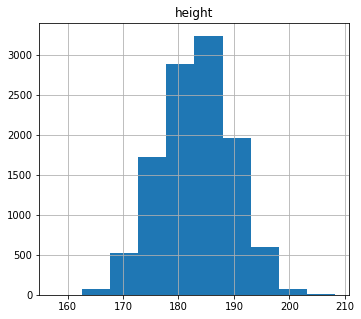

In [162]:
# visualize the distribution of height
df_p[['height']].hist(figsize = (20, 5), layout = (1, 3));

The height distribution show normal distribution form<br>
The mean height is 181.86 cm<br>
The maximal height is 208.28 cm<br>
The minimum height is 157.48 cm

In [163]:
# find player with max height
df_p.query('height == 208.28')

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight,weight_kg
97247,148325,2015-10-30,67.0,right,23.0,Kristof van Hout,1987-02-09 00:00:00,208.28,243,110.222946


The heighest player is Kristof van Hout with 208.28 cm

In [164]:
# find player with min height
df_p.query('height == 157.480000') 

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight,weight_kg
89924,97226,2012-02-22,64.0,right,90.0,Juan Quero,1984-10-17 00:00:00,157.48,117,53.070307


The smallest player is Juan Quero with 157.48 cm

### Research Question 5: Who is the heaviest and lightest player?

In [165]:
# research the data for weight_kg
df_p.weight_kg.describe()

count    11060.000000
mean        76.376014
std          6.799448
min         53.070307
25%         72.121187
50%         76.203518
75%         81.193034
max        110.222946
Name: weight_kg, dtype: float64

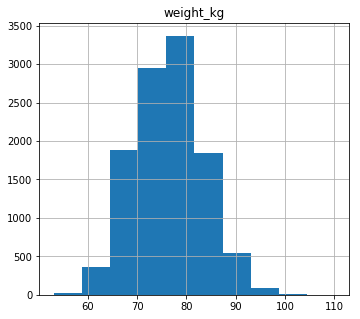

In [166]:
# visualize the distribution of weight_kg
df_p[['weight_kg']].hist(figsize = (20, 5), layout = (1, 3));

The weight distribution show normal distribution form<br>
The mean weight is 76.38 kg<br>
The maximal weight is 110.22 kg<br>
The minimum weight is 53.07 kg<br>

In [167]:
# find player with max weight_kg
df_p.query('weight == 243')

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight,weight_kg
170448,27313,2015-09-25,68.0,right,20.0,Tim Wiese,1981-12-17 00:00:00,193.04,243,110.222946
97247,148325,2015-10-30,67.0,right,23.0,Kristof van Hout,1987-02-09 00:00:00,208.28,243,110.222946


The heaviest players are Tim Wiese and Kristof van Hout with 110.22 kg

In [168]:
# find player with min weight_kg
df_p.query('weight == 117')

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight,weight_kg
89924,97226,2012-02-22,64.0,right,90.0,Juan Quero,1984-10-17 00:00:00,157.48,117,53.070307


The lighest player is Juan Quero with 53.07 kg

Text(0,0.5,'Speed')

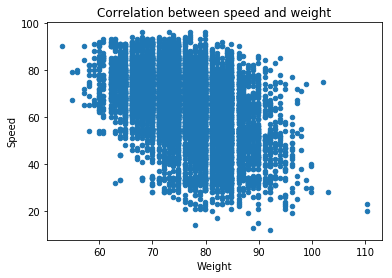

In [169]:
# visualize whether there is a correlation between speed and weight
df_p.plot(x='weight_kg', y='sprint_speed', kind='scatter')
plt.title('Correlation between speed and weight')
plt.xlabel('Weight')
plt.ylabel('Speed')

The scatterplot shows that lighter players are faster than heavy players

### Research Question 6: Who is the player with the longest name?

In [170]:
# count numbers of characters in name, also counts the spaces
df_p.player_name.str.len().max()

40

In [171]:
# create new column with characters in name
player_name_chars = df_p['player_name'].str.len()
df_p['player_name_chars'] = player_name_chars

In [172]:
# find the player with the max length of characters in name
df_p.query('player_name_chars == 40')

,player_api_id,date,overall_rating,preferred_foot,sprint_speed,player_name,birthday,height,weight,weight_kg,player_name_chars
45334,38607,2013-05-24,68.0,right,59.0,Domingos Alexandre Martins da Costa Alex,1979-09-06 00:00:00,175.26,163,73.935556,40


The player with the longest name is Domingos Alexandre Martins da Costa Alex with 40 characters(spaces included)

Text(0,0.5,'Overall rating')

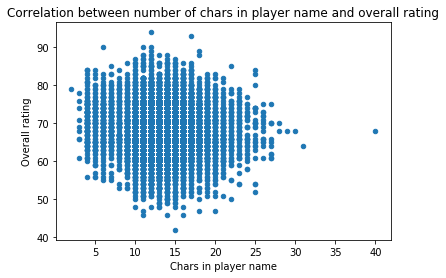

In [173]:
# visualize correlation between name length and overall rating
df_p.plot(x='player_name_chars', y='overall_rating', kind='scatter')
plt.title('Correlation between number of chars in player name and overall rating')
plt.xlabel('Chars in player name')
plt.ylabel('Overall rating')

Players with shorter names have a better overall rating. This is certainly due to the fact that the greater part of humanity has shorter names.

In [174]:
# save data
df_p.to_csv('football_player_attributes_v3.csv', index=False)
df_t.to_csv('football_team_attributes_v3.csv', index=False)

### Research Question 7: Which team has the best increase in speed overall?

In [175]:
# load data
df_p = pd.read_csv('football_player_attributes_v3.csv')
df_t = pd.read_csv('football_team_attributes_v3.csv')
df_t.head()

,team_api_id,team_long_name,team_short_name,date,speed
0,9930,FC Aarau,AAR,2010-02-22,60
1,9930,FC Aarau,AAR,2014-09-19,52
2,9930,FC Aarau,AAR,2015-09-10,47
3,8485,Aberdeen,ABE,2010-02-22,70
4,8485,Aberdeen,ABE,2011-02-22,47


In [176]:
# convert data again to datetime
df_t['date'] = pd.to_datetime(df_t['date'])
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 5 columns):
team_api_id        1457 non-null int64
team_long_name     1457 non-null object
team_short_name    1457 non-null object
date               1457 non-null datetime64[ns]
speed              1457 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 57.0+ KB


In [177]:
# Append date column in team attribut so that it is easier to compare the years
# Define a function that changes the date into year only
def to_year (date):
    if date.year:
        return str(date.year)
    
# function test
to_year(pd.to_datetime('2017-04-06')), to_year(pd.to_datetime('2013-02-18'))

('2017', '2013')

In [178]:
# Append 'year' column in team dataset
df_t['year'] = df_t['date'].apply(lambda x : to_year(x))

df_t.head()

,team_api_id,team_long_name,team_short_name,date,speed,year
0,9930,FC Aarau,AAR,2010-02-22,60,2010
1,9930,FC Aarau,AAR,2014-09-19,52,2014
2,9930,FC Aarau,AAR,2015-09-10,47,2015
3,8485,Aberdeen,ABE,2010-02-22,70,2010
4,8485,Aberdeen,ABE,2011-02-22,47,2011


In [179]:
# define a function to measure the difference of max speed and min speed of each team
def diff_speed (team_id):
    year_rating = df_t.query('team_api_id == @team_id').groupby('year')['speed'].mean()
    return year_rating.max() - year_rating.min()

# function test
diff_speed(8485)

23

In [180]:
# get improved speed of all teams and append it in team table
df_t['speed_improve'] = df_t['team_api_id'].apply(lambda t : diff_speed(t))

df_t.head()

,team_api_id,team_long_name,team_short_name,date,speed,year,speed_improve
0,9930,FC Aarau,AAR,2010-02-22,60,2010,13
1,9930,FC Aarau,AAR,2014-09-19,52,2014,13
2,9930,FC Aarau,AAR,2015-09-10,47,2015,13
3,8485,Aberdeen,ABE,2010-02-22,70,2010,23
4,8485,Aberdeen,ABE,2011-02-22,47,2011,23


In [181]:
# drop duplicates for better readability
df_t.drop_duplicates(subset=['team_api_id'], keep='last', inplace=True)

In [182]:
# sort by speed improve in descending order
df_t.sort_values('speed_improve', ascending=False, inplace=True)
df_t.head(5)

,team_api_id,team_long_name,team_short_name,date,speed,year,speed_improve
75,9825,Arsenal,ARS,2015-09-10,59,2015,50
275,208931,Carpi,CAP,2015-09-10,80,2015,48
220,9788,Borussia Mönchengladbach,GLA,2015-09-10,31,2015,45
652,8245,Korona Kielce,KKI,2015-09-10,59,2015,45
1339,10205,Villarreal CF,VIL,2015-09-10,48,2015,44


The team with the highest improvent in speed is Arsenal with 50

In [183]:
# average speed improve for all teams
df_t['speed_improve'].mean()

20.677083333333332

<a id='conclusions'></a>
## Conclusions

1. Who are the players with an overall rating above 90? 

The players are:

    1. Lionel Messi:       94
    2. Christiano Ronaldo: 93
    2. Gianluigi Buffon:   93
    2. Ronaldinho:         93
    3. Gregory Coupet:     92
    3. Xavi Hernandez:     92
    4. Allesandro Nesta:   91
    4. Andres Iniesta:     91
    4. Fabio Cannavaro:    91
    4. Iker Casillas:      91
    4. John Terry:         91
    4. Ronaldinho:         91
    4. Thierry Henry:      91

Lionel Messi is the player with the highest overall rating during his carrer.


2. Who is the fastest player?

There are 2 players with a speed of 97.

The players are:

David Odonkor
Mathis Bolly


3. Do right or left feet players have the higher overall rating in the last existing data record?

Number of all players prefer left foot: 2687
Number of all players prefer right foot: 8373

umber of low rated players prefer left foot: 1307
Number of high rated players prefer left foot: 1380
    
Number of low rated players prefer right foot: 4107
Number of high rated players prefer right foot: 4266

In total:

48.64% of low rated players prefer their left foot and
49.05% of low rated players prefer their right foot

51.36% of high rated players prefer their left foot and
50.94% of high rated players prefer their right foot

The result shows that more than 0.41% of high rated players prefer their left foot.
There are no notable differences to be found between the rating of left or right feet players.


4. Who is the highest and smallest player?

The heighest player is Kristof van Hout with 208.28 cm
The smallest player is Juan Quero with 157.48 cm


5. Who is the heaviest and lightest player?

The heaviest players are Tim Wiese and Kristof van Hout with 110.22 kg
The lighest player is Juan Quero with 53.07 kg


6. Who is the player with the longest name?

The player with the longest name is Domingos Alexandre Martins da Costa Alex with 40 characters(spaces included)

7. Which team has the best increase in speed overall?

The team with the highest improvent in speed is Arsenal with 50 points. And the mean improvemt of all teams is 20.68 points.

In [184]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0